In [28]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32") / 255.0


In [30]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.8998 - loss: 0.3319 - val_accuracy: 0.9803 - val_loss: 0.0634
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9840 - loss: 0.0521 - val_accuracy: 0.9878 - val_loss: 0.0415
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9884 - val_loss: 0.0324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9923 - loss: 0.0243 - val_accuracy: 0.9891 - val_loss: 0.0308
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9907 - val_loss: 0.0279


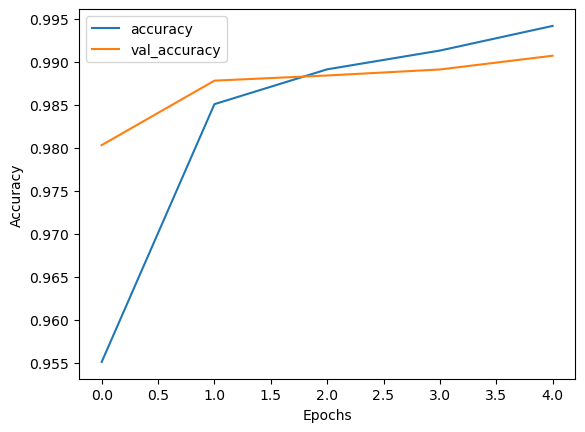

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


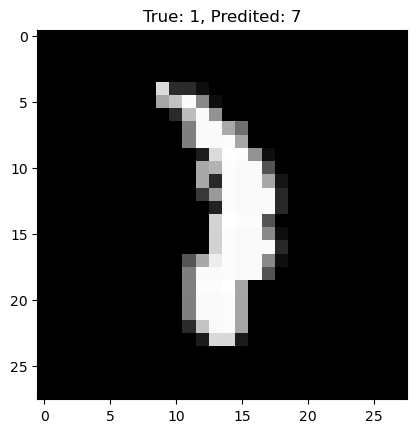

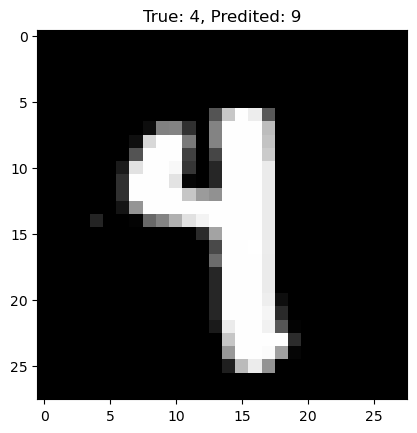

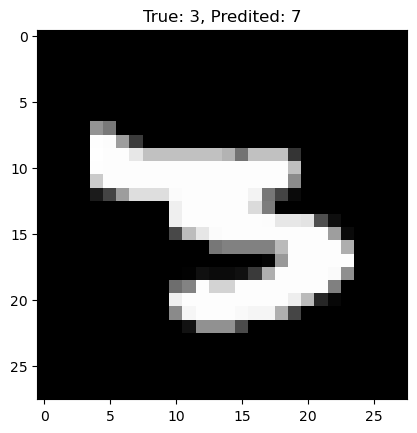

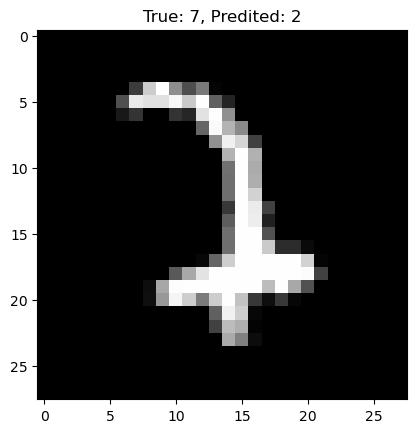

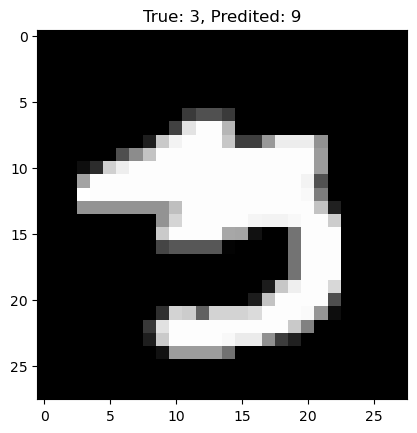

In [33]:
import random
predictions = model.predict(x_test)
misclassified_indices = [i for i in range(len(y_test)) if np.argmax(predictions[i]) != y_test[i]]
random_samples = random.sample(misclassified_indices, 5)

for i in random_samples:
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predited: {np.argmax(predictions[i])}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


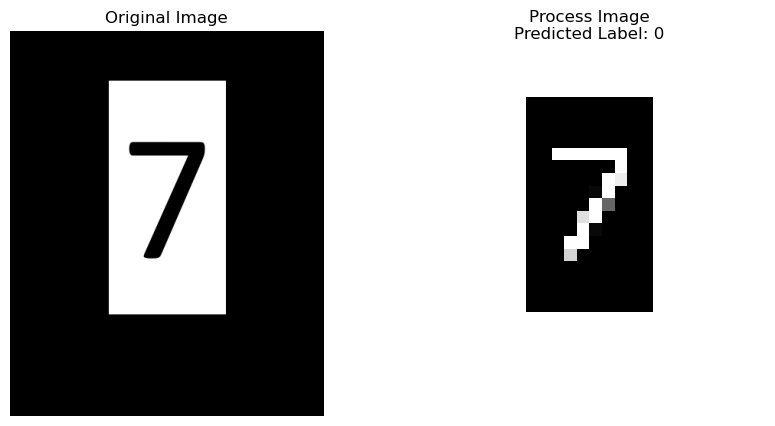

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "data/test_Images/234.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded")
else:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    image_resized = cv2.resize(image, (28,28))

    image_resized = 255 - image_resized

    image_resized = image_resized.astype("float32") / 255.0
    image_resized = image_resized.reshape(1,28,28,1)

    prediction = model.predict(image_resized)
    predicted_label = np.argmax(prediction)

    plt.subplot(1,2,2)
    plt.imshow(image_resized.reshape(28, 28), cmap='gray')
    plt.title(f"Process Image\nPredicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()